# Visualization of performance of models in each of the tasks

In [8]:
import os

import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
# Function definitions
def read_in_data_cube(base_path: str = "../data", filename: str = "auc_roc_tensors_dict.npz") -> dict[str:np.ndarray]:
    """Read in the numpy array given a base path, the dataset_id, and the error_rate."""
    path = os.path.join(base_path, filename)
    return np.load(path, allow_pickle=True)

# Alternate set_size()
def set_size_alt(width_pt,
             fraction: float = 1.0,
             golden_ratio: float = (5**.5 - 1) / 2,
             h_scale: float = 1.0):
    """
    Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width_pt : float
        Document textwidth or columnwidth in pts.
    fraction : float, optional
        Fraction of the width which you wish the figure to occupy.
    golden_ratio : float, optional
        Height/width ratio (default = classic golden ratio ~0.618).
    h_scale : float, optional
        Further shrink (or stretch) the computed height.

    Returns
    -------
    (fig_width_in, fig_height_in) : tuple of floats
        Dimensions of figure in inches.
    """
    # 1. figure width in pts
    fig_width_pt = width_pt * fraction
    # 2. convert pts → inches
    inches_per_pt = 1.0 / 72.27
    fig_width_in = fig_width_pt * inches_per_pt
    # 3. compute height in inches
    fig_height_in = fig_width_in * golden_ratio * h_scale
    return (fig_width_in, fig_height_in)


def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

## Prepare Data for Plotting

In [10]:
data_dict = read_in_data_cube()
dataset_ids = data_dict.files
dataset_ids

['1046',
 '1049',
 '1050',
 '1063',
 '1067',
 '1068',
 '1461',
 '1464',
 '1480',
 '1494',
 '151',
 '1510',
 '23',
 '23517',
 '251',
 '31',
 '310',
 '37',
 '40701',
 '40975',
 '40994',
 '4135',
 '42493',
 '44',
 '44025',
 '44026',
 '44054',
 '44055',
 '44056',
 '44059',
 '44061',
 '44062',
 '44063',
 '44064',
 '44066',
 '44089',
 '44090',
 '44091',
 '44120',
 '44122',
 '44123',
 '44124',
 '44125',
 '44126',
 '44127',
 '44130',
 '44131',
 '44132',
 '44133',
 '44134',
 '44136',
 '44137',
 '44138',
 '44139',
 '44140',
 '44141',
 '44142',
 '44144',
 '44145',
 '44147',
 '44148',
 '44156',
 '44157',
 '44158',
 '44160',
 '44162',
 '44956',
 '44957',
 '44958',
 '44959',
 '44960',
 '44962',
 '44963',
 '44964',
 '44966',
 '44967',
 '44969',
 '44970',
 '44971',
 '44972',
 '44974',
 '44976',
 '44977',
 '44978',
 '44979',
 '44980',
 '44981',
 '44983',
 '44984',
 '44987',
 '44989',
 '44990',
 '44993',
 '44994',
 '45012',
 '4534',
 '45402',
 '54',
 '6',
 '725',
 '823']

In [11]:
numpy_arrays = [data_dict[dataset_id] for dataset_id in data_dict.files]
# print(numpy_arrays[1].shape[2])  # Number of columns in dataset x (2 here)
print(f"Number of experiments per error mechanism: (num_error_rates) * (dirty/clean) * (num_columns) = {sum([a.shape[2] for a in numpy_arrays])*5*2}")
concatenated = np.concatenate(numpy_arrays, axis=2)

s = concatenated.shape

transposed = concatenated.transpose(0,1,3,4,2,5).mean(axis=-1)  # Aggregate over the cross validation.

transposed.shape

merged = transposed.reshape(s[0], s[1], s[3], s[4], -1)[:, :, :, :3, :]  # We decided on using only 3 scenarios

merged.shape  # (error rate, error mechanism, clean/dirty, scenario, AUC-ROC)

# error_rate (5): 0.1, 0.25, 0.5, 0.75, 0.9
# error_mechanism (3): ECAR, EAR, ENAR
# clean/dirty (2): Clean, Dirty
# case (3): Complete, Shuffled, Missing

Number of experiments per error mechanism: (num_error_rates) * (dirty/clean) * (num_columns) = 21920


(5, 3, 2, 3, 2192)

In [ ]:
# Prep for catplot
data = merged

error_rates = [0.1, 0.25, 0.5, 0.75, 0.9]
error_mechanisms = ['MCAR', 'MAR', 'MNAR']
clean_dirty = ['Clean', 'Dirty']
scenarios = ['Full Data', 'Scrambled', 'Missing Col.']

index = pd.MultiIndex.from_product(
    [error_rates, error_mechanisms, clean_dirty, scenarios],
    names=['error_rate', 'error_mechanism', 'clean_dirty', 'scenario']
)

index_repeated = index.repeat(data.shape[-1])

values = data.reshape(-1)

df = pd.DataFrame({
    'auc_roc': values
}, index=index_repeated).reset_index()

df_clean = df[df["clean_dirty"] == "Clean"]
df_dirty = df[df["clean_dirty"] == "Dirty"]

## Error Rate 0.5 Plots

Clean

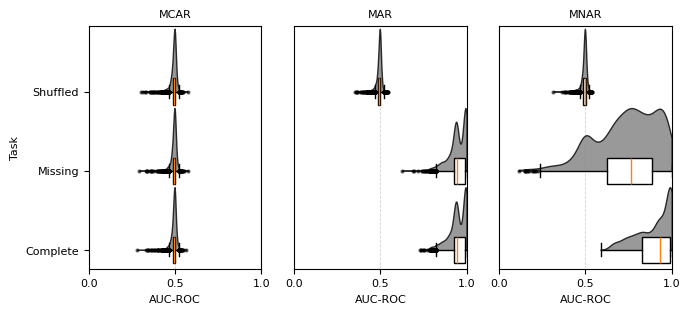

In [13]:
# Scenario label mapping
scenario_map = {
    "Full Data": "Complete",
    "Scrambled": "Shuffled",
    "Missing Col.": "Missing"
}

font_size = 8

# Filter and rename
df_half_error = df_clean[df_clean['error_rate'] == 0.5].copy()
df_half_error['scenario'] = df_half_error['scenario'].replace(scenario_map)

# Setup
error_mechanisms = ['MCAR', 'MAR', 'MNAR']  # fixed ordering
scenarios = sorted(df_half_error['scenario'].unique())

fig, axes = plt.subplots(
    nrows=1, ncols=len(error_mechanisms),
    figsize= set_size_alt(506.295, h_scale=0.75), #set_size(506.295),
    sharex=True, sharey=False
)

if len(error_mechanisms) == 1:
    axes = [axes]

# Vertical spacing and y-tick positions
spacing = 0.4
y_positions = np.arange(len(scenarios)) * spacing * 0.6

for col_idx, mechanism in enumerate(error_mechanisms):
    subset = df_half_error[df_half_error['error_mechanism'] == mechanism]
    ax = axes[col_idx]

    # Add vertical gridline at x = 0.5
    ax.axvline(
        x=0.5,
        color='lightgray',
        linestyle='--',
        linewidth=0.6,
        zorder=0
    )

    for i, scenario in enumerate(scenarios):
        vals = subset.loc[subset['scenario'] == scenario, 'auc_roc']
        vp = ax.violinplot(
            vals,
            positions=[y_positions[i]],
            vert=False,
            widths=spacing * 0.95,
            showextrema=False
        )
        for body in vp['bodies']:
            body.set_facecolor('gray')
            body.set_edgecolor('black')
            body.set_alpha(0.8)

            # Clip the lower half
            clip_rect = mpl.patches.Rectangle(
                (0, y_positions[i]),
                1.0,
                spacing / 2,
                transform=ax.transData
            )
            body.set_clip_path(clip_rect)

        ax.boxplot(
            vals,
            positions=[y_positions[i]],
            vert=False,
            widths=spacing * 0.2,
            patch_artist=True,
            boxprops=dict(facecolor='white', edgecolor='black'),
            medianprops=dict(color='#ff7f0e'),
            flierprops={
                'marker': 'o',
                'markerfacecolor': 'black',
                'markeredgecolor': 'black',
                'markersize': 2,
                'alpha': 0.5
            }
        )

    if col_idx == 0:
        ax.set_yticks(y_positions)
        ax.set_yticklabels(scenarios, fontsize=font_size)
        ax.set_ylabel("Task", fontsize=font_size)
    else:
        ax.set_yticks([])
        ax.set_yticklabels([])

    ax.set_xlim(0, 1)
    ax.set_xlabel('AUC-ROC', fontsize=font_size)
    ax.set_title(mechanism, fontsize=font_size)

    bottom = y_positions[0] - spacing / 7
    top = y_positions[-1] + spacing / 2
    ax.set_ylim(bottom, top)

for ax in axes:
    ax.xaxis.set_major_locator(mticker.MultipleLocator(0.5))
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
    ax.xaxis.set_minor_locator(mticker.NullLocator())
    ax.tick_params(axis='x', labelsize=font_size)

plt.tight_layout()
plt.savefig("../plots/auc_roc_clean_violinplots.pdf", bbox_inches="tight")
plt.show()

Dirty

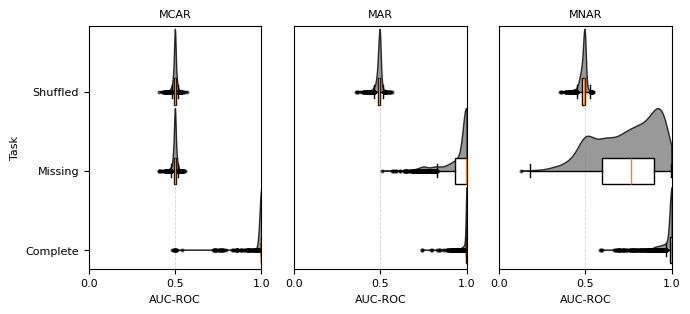

In [14]:
# Scenario label mapping
scenario_map = {
    "Full Data": "Complete",
    "Scrambled": "Shuffled",
    "Missing Col.": "Missing"
}

# Filter and rename
df_half_error = df_dirty[df_dirty['error_rate'] == 0.5].copy()
df_half_error['scenario'] = df_half_error['scenario'].replace(scenario_map)

# Setup
error_mechanisms = ['MCAR', 'MAR', 'MNAR']  # fixed ordering
scenarios = sorted(df_half_error['scenario'].unique())

fig, axes = plt.subplots(
    nrows=1, ncols=len(error_mechanisms),
    figsize= set_size_alt(506.295, h_scale=0.75), #set_size(506.295),
    sharex=True, sharey=False
)

if len(error_mechanisms) == 1:
    axes = [axes]

# Vertical spacing and y-tick positions
spacing = 0.4
y_positions = np.arange(len(scenarios)) * spacing * 0.6

for col_idx, mechanism in enumerate(error_mechanisms):
    subset = df_half_error[df_half_error['error_mechanism'] == mechanism]
    ax = axes[col_idx]

    # Add vertical gridline at x = 0.5
    ax.axvline(
        x=0.5,
        color='lightgray',
        linestyle='--',
        linewidth=0.6,
        zorder=0
    )

    for i, scenario in enumerate(scenarios):
        vals = subset.loc[subset['scenario'] == scenario, 'auc_roc']
        vp = ax.violinplot(
            vals,
            positions=[y_positions[i]],
            vert=False,
            widths=spacing * 0.95,
            showextrema=False
        )
        for body in vp['bodies']:
            body.set_facecolor('gray')
            body.set_edgecolor('black')
            body.set_alpha(0.8)

            # Clip the lower half
            clip_rect = mpl.patches.Rectangle(
                (0, y_positions[i]),
                1.0,
                spacing / 2,
                transform=ax.transData
            )
            body.set_clip_path(clip_rect)

        ax.boxplot(
            vals,
            positions=[y_positions[i]],
            vert=False,
            widths=spacing * 0.2,
            patch_artist=True,
            boxprops=dict(facecolor='white', edgecolor='black'),
            medianprops=dict(color='#ff7f0e'),
            flierprops={
                'marker': 'o',
                'markerfacecolor': 'black',
                'markeredgecolor': 'black',
                'markersize': 2,
                'alpha': 0.5
            }
        )

    if col_idx == 0:
        ax.set_yticks(y_positions)
        ax.set_yticklabels(scenarios, fontsize=font_size)
        ax.set_ylabel("Task", fontsize=font_size)
    else:
        ax.set_yticks([])
        ax.set_yticklabels([])

    ax.set_xlim(0, 1)
    ax.set_xlabel('AUC-ROC', fontsize=font_size)
    ax.set_title(mechanism, fontsize=font_size)

    bottom = y_positions[0] - spacing / 7
    top = y_positions[-1] + spacing / 2
    ax.set_ylim(bottom, top)

for ax in axes:
    ax.xaxis.set_major_locator(mticker.MultipleLocator(0.5))
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
    ax.xaxis.set_minor_locator(mticker.NullLocator())
    ax.tick_params(axis='x', labelsize=font_size)

plt.tight_layout()
plt.savefig("../plots/auc_roc_dirty_violinplots.pdf", bbox_inches="tight")
plt.show()